## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE = [10, 15, 20 , 25]

In [7]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping

results = {}
for patience in PATIENCE:
    keras.backend.clear_session() #把舊的Graph清掉
    print("Experiment with PATIENCE = %d" % (patience))
    
    earlystop = EarlyStopping(monitor='val_acc',
                          patience=patience,
                          verbose=1)
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-patience-%s" % (str(patience))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with PATIENCE = 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)      

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.2492 - acc: 0.2640 - val_loss: 2.0841 - val_acc: 0.3272
Epoch 2/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7404 - acc: 0.3988 - val_loss: 1.8310 - val_acc: 0.3786
Epoch 3/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6169 - acc: 0.4371 - val_loss: 1.6863 - val_acc: 0.4156
Epoch 4/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.5439 - acc: 0.4621 - val_loss: 1.6448 - val_acc: 0.4222
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4927 - acc: 0.4795 - val_loss: 1.6086 - val_acc: 0.4380
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.4485 - acc: 0.4956 - val_loss: 1.5814 - val_acc: 0.4445
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4093 - acc: 0.5104 - val_loss: 1.5624 - val_acc

50000/50000 [==============================] - 2s 47us/step - loss: 1.6175 - acc: 0.4331 - val_loss: 1.6735 - val_acc: 0.4119
Epoch 4/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5470 - acc: 0.4570 - val_loss: 1.6238 - val_acc: 0.4227
Epoch 5/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4909 - acc: 0.4764 - val_loss: 1.5923 - val_acc: 0.4367
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4471 - acc: 0.4918 - val_loss: 1.5662 - val_acc: 0.4479
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4080 - acc: 0.5064 - val_loss: 1.5472 - val_acc: 0.4558
Epoch 8/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3730 - acc: 0.5202 - val_loss: 1.5365 - val_acc: 0.4591
Epoch 9/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3422 - acc: 0.5321 - val_loss: 1.5269 - val_acc: 0.4605
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 3s 68us/step - loss: 2.2227 - acc: 0.2639 - val_loss: 2.1368 - val_acc: 0.3089
Epoch 2/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7474 - acc: 0.3905 - val_loss: 1.7844 - val_acc: 0.3817
Epoch 3/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6210 - acc: 0.4324 - val_loss: 1.6804 - val_acc: 0.4132
Epoch 4/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.5461 - acc: 0.4601 - val_loss: 1.6228 - val_acc: 0.4266
Epoch 5/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.4932 - acc: 0.4781 - val_loss: 1.5773 - val_acc: 0.4457
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4455 - acc: 0.4943 - val_loss: 1.5621 - val_acc: 0.4522
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.4066 - acc: 0.5098 - val_loss: 1.5495 - val_acc: 0.4527
Epoch 8/50
50000/50000 [============================

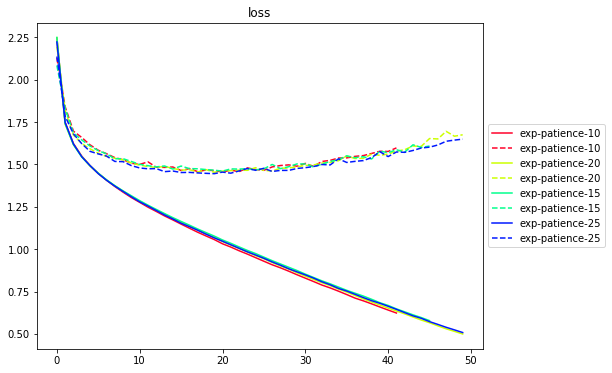

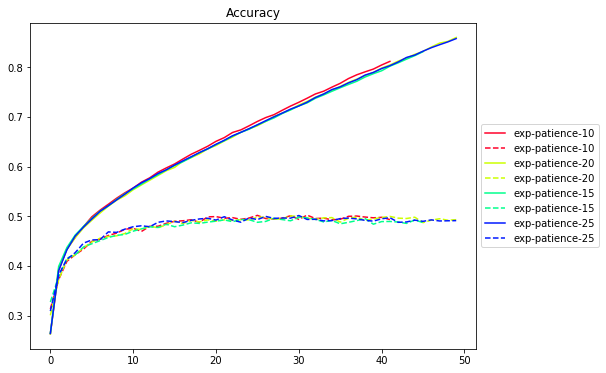

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()